<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #7d2e00ff, #41180067); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 7 Day 22/8
    </h1>
</div>



<h4 style="color:#b84f13ff">1. Import Dependencies for Data Handling, Visualization, and Deep Learning</h4>


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

<h4 style="color:#b84f13ff">2. Checking GPU Availability in TensorFlow</h4>

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


<h4 style="color:#b84f13ff">3. Listing and Configuring GPU Devices in TensorFlow</h4>

In [ ]:
#check GPUs
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  0


<h4 style="color:#b84f13ff">4. Initializing the Pretrained MobileNet Model</h4>

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


<h4 style="color:#b84f13ff">5. Preparing and Preprocessing Images for MobileNet</h4>

In [6]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

<h4 style="color:#b84f13ff">6. Loading an Image, Preprocessing, and Making Predictions with MobileNet</h4>


In [ ]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200) 
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)

<h4 style="color:#b84f13ff">7. Decoding and Displaying MobileNet Prediction Results</h4>

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.65274405),
  ('n01693334', 'green_lizard', 0.18943544),
  ('n01687978', 'agama', 0.13799594),
  ('n01689811', 'alligator_lizard', 0.01360102),
  ('n01688243', 'frilled_lizard', 0.004315498)]]

<h4 style="color:#b84f13ff">8. Displaying a Second Sample Image</h4>

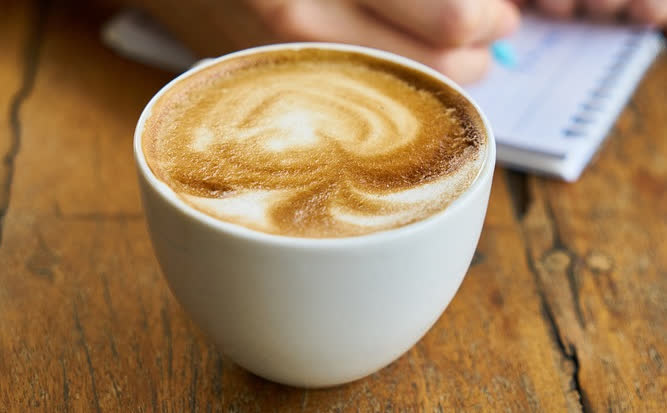

In [ ]:
Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200)

<h4 style="color:#b84f13ff">9. Preprocessing Second Image and Generating Predictions with MobileNet</h4>

In [ ]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.9766624),
  ('n07930864', 'cup', 0.010093615),
  ('n07932039', 'eggnog', 0.008597039),
  ('n03063599', 'coffee_mug', 0.0036651848),
  ('n04597913', 'wooden_spoon', 0.00049637427)]]

<h4 style="color:#b84f13ff">10. Displaying a Third Sample Image</h4>

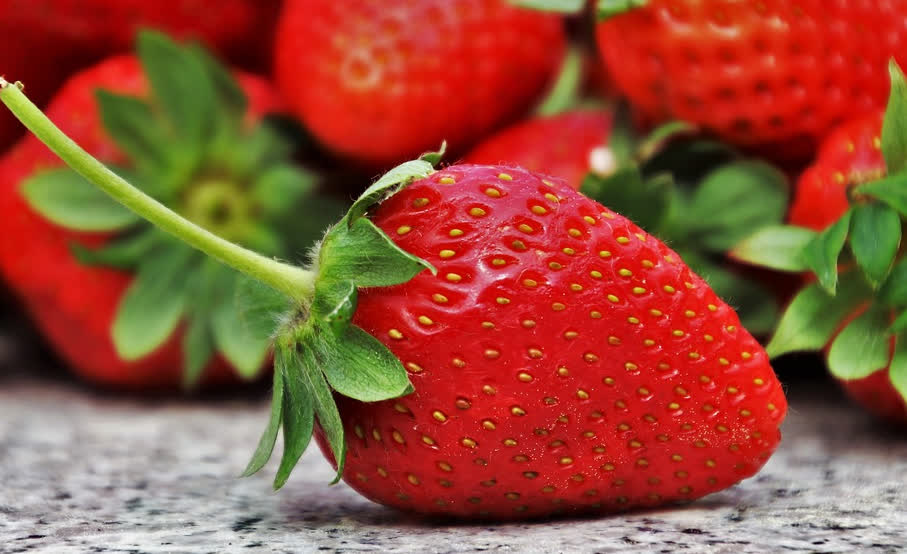

In [ ]:
Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200) 

<h4 style="color:#b84f13ff">11. Preprocessing Third Image and Generating Predictions with MobileNet</h4>

In [ ]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2441996e-06),
  ('n07747607', 'orange', 8.602159e-07),
  ('n07753275', 'pineapple', 8.278077e-07),
  ('n07768694', 'pomegranate', 6.2609377e-07)]]

<h4 style="color:#b84f13ff">12. Getting the Current Working Directory</h4>

In [ ]:
os.getcwd()

'c:\\Users\\Rammah\\OneDrive\\Desktop\\اجازه ان شاء الله\\ML\\Day12\\Tasks\\Task1'

<h4 style="color:#b84f13ff">13. Organizing Dataset into Training, Validation, and Test Directories</h4>

In [ ]:
os.chdir(r'Sign-Language-Digits-Dataset-master')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')    
    os.mkdir('test')    
    
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')
os.chdir('..')

<h4 style="color:#b84f13ff">14. Creating Training, Validation, and Test Batches with ImageDataGenerator</h4>


In [ ]:
test_path = r'Sign-Language-Digits-Dataset-master\test'
train_path = r'Sign-Language-Digits-Dataset-master\train'
valid_path = r'Sign-Language-Digits-Dataset-master\valid'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


<h4 style="color:#b84f13ff">15. Initializing MobileNet without Top Layers for Transfer Learning</h4>

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet(include_top=False, input_shape=(224,224,3))

<h4 style="color:#b84f13ff">16. Adding Global Average Pooling Layer to MobileNet Output</h4>


In [ ]:
x = GlobalAveragePooling2D()(mobile.output)
x

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_361>

<h4 style="color:#b84f13ff">17. Adding Output Layer with Softmax Activation for 10 Classes</h4>

In [ ]:
output = Dense(10,activation='softmax')(x)

<h4 style="color:#b84f13ff">18. Building the Final Model and Displaying Summary</h4>

In [ ]:
model = Model(inputs = mobile.input, outputs = output)
model.summary()

<h4 style="color:#b84f13ff">19. Freezing All Layers Except the Last 23 in MobileNet</h4>

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

<h4 style="color:#b84f13ff">20. Displaying the Model Architecture Summary</h4>


In [ ]:
model.summary()

<h4 style="color:#b84f13ff">21. Compiling and Training the Model, Then Retrieving Test Labels</h4>

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_batches,validation_data=valid_batches,epochs=2,verbose=1)
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

<h4 style="color:#b84f13ff">22. Making Predictions on Test Data and Generating Confusion Matrix</h4>



In [ ]:
prediction = model.predict(test_batches)
cm = confusion_matrix(test_labels,prediction.argmax(axis=1))
cm

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]], dtype=int64)

<h4 style="color:#b84f13ff">23. Displaying the Unique Set of Test Labels</h4>

In [ ]:
set([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

<h4 style="color:#b84f13ff">24. Visualizing the Confusion Matrix with Seaborn Heatmap</h4>

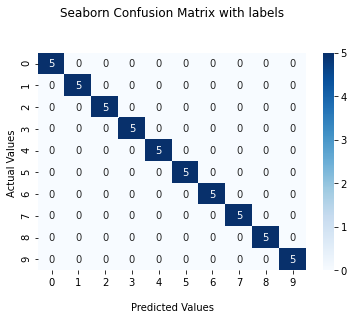

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.yaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.show()

### 59.Mask detection using MobilNetV2

<h4 style="color:#b84f13ff">25. Importing Libraries for MobileNetV2, Data Preprocessing, and Model Evaluation</h4>


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Input,MaxPooling2D
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<h4 style="color:#b84f13ff">26. Setting Hyperparameters and Loading the Face Mask Dataset</h4>

In [ ]:
LR = 1e-4
EPOCHS = 20
BS = 32

DIRECTORY = r'Face-Mask-Detection-master\dataset'
CATEGORIES = ['with_mask','without_mask']

data =[]
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY,category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path,target_size=(224,224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)
        

C:\Users\Elshahaby\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<h4 style="color:#b84f13ff">27. Encoding Labels, Converting to Arrays, and Splitting Data into Train/Test Sets</h4>

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype='float32')
labels = np.array(labels)
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = .2, stratify = labels, random_state = 42)

<h4 style="color:#b84f13ff">28. Creating an ImageDataGenerator for Data Augmentation</h4>

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=.15,
                        width_shift_range=.2,
                        height_shift_range=.2,
                        shear_range=.15,
                        horizontal_flip=True)

<h4 style="color:#b84f13ff">29. Building Face Mask Detection Model Using MobileNetV2 Base and Custom Head</h4>

In [ ]:
baseModel = MobileNetV2(include_top=False,input_tensor=Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(3,3))(headModel)
headModel = Flatten(name='flatten')(headModel)
headModel = Dense(64,activation='relu')(headModel)
headModel = Dropout(.5)(headModel)
headModel = Dense(2,activation='softmax')(headModel)

model = Model(inputs = baseModel.input, outputs = headModel)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

<h4 style="color:#b84f13ff">30. Freezing All Layers of the MobileNetV2 Base Model</h4>

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

<h4 style="color:#b84f13ff">31. Displaying the Face Mask Detection Model Summary</h4>

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

<h4 style="color:#b84f13ff">32. Compiling and Training the Face Mask Detection Model</h4>

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
H = model.fit(aug.flow(train_x,train_y, batch_size=BS),validation_data=(test_x,test_y),epochs=EPOCHS,verbose=1)

Epoch 1/20
96/96 [==============================] - 50s 494ms/step - loss: 0.2727 - accuracy: 0.9240 - val_loss: 0.0303 - val_accuracy: 0.9896
Epoch 2/20
96/96 [==============================] - 54s 554ms/step - loss: 0.0876 - accuracy: 0.9697 - val_loss: 0.0268 - val_accuracy: 0.9922
Epoch 3/20
96/96 [==============================] - 49s 504ms/step - loss: 0.0873 - accuracy: 0.9674 - val_loss: 0.0275 - val_accuracy: 0.9935
Epoch 4/20
96/96 [==============================] - 51s 530ms/step - loss: 0.0729 - accuracy: 0.9703 - val_loss: 0.0234 - val_accuracy: 0.9935
Epoch 5/20
96/96 [==============================] - 48s 497ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.0546 - val_accuracy: 0.9883
Epoch 6/20
96/96 [==============================] - 49s 504ms/step - loss: 0.0731 - accuracy: 0.9697 - val_loss: 0.0520 - val_accuracy: 0.9804
Epoch 7/20
96/96 [==============================] - 57s 593ms/step - loss: 0.0812 - accuracy: 0.9631 - val_loss: 0.0243 - val_accuracy: 0.9935

<h4 style="color:#b84f13ff">33. Checking Trainable Status of Model Layers</h4>

In [ ]:
for l in model.layers:
    print(l.name, l.trainable)

input_7 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

<h4 style="color:#b84f13ff">34. Making Predictions and Generating Classification Report</h4>

In [ ]:
prediction = model.predict(test_x)
prediction = np.argmax(prediction,axis=1)
print(classification_report(test_y.argmax(axis=1),prediction,target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



<h4 style="color:#b84f13ff">35. Saving the Trained Face Mask Detection Model</h4>

In [ ]:
model.save('mask_detector.model',save_format='h5')

C:\Users\Elshahaby\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


### 60.Mask Detection in real time usine Caffe model and MobilNet

<h4 style="color:#b84f13ff">36. Real-Time Face Mask Detection from Webcam Using OpenCV and Trained Model</h4>


In [ ]:
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import imutils
import time

def detect_and_predict_mask(frame, faceNet, maskNet):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
        (104.0, 177.0, 123.0)) 
    faceNet.setInput(blob)
    detections = faceNet.forward() 
    print(detections.shape)
    faces = []
    locs = []
    preds = []

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            faces.append(face)
            locs.append((startX, startY, endX, endY))

    if len(faces) > 0:

        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

    return (locs, preds)


prototxtPath = r"Face-Mask-Detection-master\face_detector\deploy.prototxt"
weightsPath = r"Face-Mask-Detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

maskNet = load_model("mask_detector.model")

print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

while True:

    frame = vs.read()
    frame = imutils.resize(frame, width=400)
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

    for (box, pred) in zip(locs, preds):

        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        cv2.putText(frame, label, (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] starting video stream...
